#**Problem:** 
###We are opening a Cake Shops and we have list of locations of BUYERS who frequently order Cake we want to find out optimal locations of Cake Shops where they should be opened?

#**K-means**
- Common clustering technique, helps to solve many problems efficiently.
- one of the simplest and popular unsupervised machine learning algorithms.
- unsupervised algorithms means that our datasets using only input vectors(X) without referring to labelled, outcomes(Y).
-a common technique for statistical data analysis
##**The objective of K-means is simple:**
###Group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.
In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster,The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.


![cake_meme](https://user-images.githubusercontent.com/42711978/87532315-908e2580-c6b0-11ea-8eff-01000290d667.jpg)


#Step-1 : Initialise Cake Shops randomly.

![img2133](https://user-images.githubusercontent.com/42711978/87532558-f7abda00-c6b0-11ea-9f0c-f5730efa1eca.png)


#Step-2 : Assign each Buyer to its nearest Cake Shop.

![img2](https://user-images.githubusercontent.com/42711978/87532632-1316e500-c6b1-11ea-9b78-64e16a818b60.png)


#Step-3 : Update the Shop Location by taking mean of Buyers assigned to it.

![img21](https://user-images.githubusercontent.com/42711978/87532691-29bd3c00-c6b1-11ea-8b03-ba6aef024807.png)


#Step-4 : Repeat Steps 2 and 3 Until Convergence.

![img213](https://user-images.githubusercontent.com/42711978/87532792-48233780-c6b1-11ea-9cf9-be5acc7f2de2.png)


##**How the K-means algorithm works?**



To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

**1. Cluster assignment**<br>
the algorithm goes through each of the data points and depending on which cluster is closer, It assigns the data points to one of the cluster centroids.<br>
**2. Updation centroid**<br>
K-means moves the centroids to the average of the points in a cluster. In other words, the algorithm calculates the average of all the points in a cluster and moves the centroid to that average location.
This process is repeated until there is no change in the clusters. K is chosen randomly or by giving specific initial starting points by the us.


![img](https://user-images.githubusercontent.com/42711978/87543560-97be2f00-c6c2-11ea-8ab3-f7fd89605cfb.png)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Here we’ll generate our own data using the make_blobs function from the sklearn.datasets module
#The centers parameter specifies the number of clusters.
from sklearn.datasets import make_blobs

In [3]:
#It will generate isotropic Gaussian Blobs for clustering.
#basically it will create Clusters 
#we will not use y as unsupervised learning 

In [4]:
#intialise our k =5
k=5 #cluster center

In [5]:
#X,y =make_blobs(n_samples=500,n_features=2,centers=5,random_state=10) #press shift+tab to read about all parameters
#or
X,_=make_blobs(n_samples=500,n_features=2,centers=k,random_state=10)

In [6]:
X[:10]


array([[ -7.32786741,   4.23641465],
       [  1.12565931,   6.32088416],
       [ -0.49239887,  -5.28550826],
       [ -7.12432134,   6.16236021],
       [  2.38696269,   4.11331935],
       [  6.55519802, -10.28277104],
       [ -4.60484127,   4.27470475],
       [ -1.27010839,  -6.55718306],
       [  5.77989048,  -9.7922405 ],
       [ -7.72699176,  -9.47166311]])

In [7]:
X[:10,0]

array([-7.32786741,  1.12565931, -0.49239887, -7.12432134,  2.38696269,
        6.55519802, -4.60484127, -1.27010839,  5.77989048, -7.72699176])

In [8]:
X.shape

(500, 2)

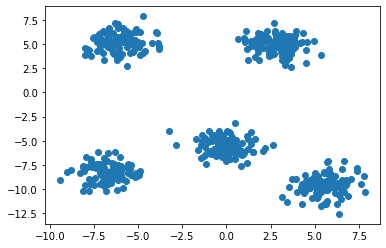

In [9]:
#X[:,feature1] ,X[:,feature2]
plt.scatter(X[:,0],X[:,1])
#five Cluster 
#we have to find labels for them for eg color mapping 

In [10]:
#intialisng colors
color=["red","maroon","blue","yellow","orange"]

In [11]:
#intialize clusters- centeroid by finding mean of data(centers) randomly
for i in range(k):
    center =np.random.randint(-8,10,size=(X.shape[1]))

In [12]:
#np.random.randint(-8,10,size=(X.shape[1],))
#or this can be written as
np.random.randint(-8,10,size=(2,))
#everytime different intialisation 
#so step 1 is very important to get perfect clusters

array([-7, -3])

In [13]:
(X.shape[1],)

(2,)

In [14]:
#making an empty dictionary of clusters we will use to store 
#points associated with cluster 
#their center
#their color
clusters={}

#step 1-*Initialize* all the **Cluster Center** randomly

In [26]:
# Initialize clusters

for i in range(k):
    center = np.random.randint(-8, 10, size= (X.shape[1],), )
    points = []
    
    cluster = {
        'center' : center,
        'points' : points,
        'color' : color[i]
    }
    
    clusters[i] = cluster

In [27]:
#its a dictonary of all the clusters containing centers and color 
#now points is for the list of all points nearest to cluster centers 
clusters


{0: {'center': array([-8, -2]), 'points': [], 'color': 'red'},
 1: {'center': array([-2,  7]), 'points': [], 'color': 'maroon'},
 2: {'center': array([-2, -5]), 'points': [], 'color': 'blue'},
 3: {'center': array([ 3, -7]), 'points': [], 'color': 'yellow'},
 4: {'center': array([2, 5]), 'points': [], 'color': 'orange'}}

###For Ploting 

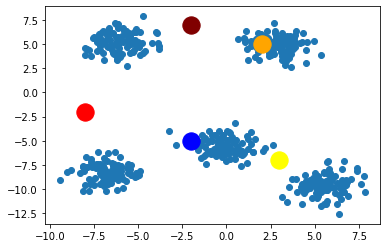

In [28]:
plt.scatter(X[:, 0], X[:, 1])

for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    plt.scatter(center[0], center[1], c=clusters[i]['color'], s=300, marker="o")
    #here we also taking color from the repective cluster's color
    
    
plt.show()

# Step2- Assign All points to nearest Cluster 

In [29]:
#it will iterate over all the points
#find the distance from all 5  =k and include which is nearest or less distance 

In [30]:
#Euclidean Distance b/w cluster points and cluster center
def distance(v1, v2):
    return np.sum((v2-v1)**2)**0.5

In [31]:
def assignPointsToCluster(clusters, X):
    
    for ix in range(X.shape[0]):#iterate for all the examples
        distance_of_i = [] #we can make alist of five distance from cluster center
        
        for kx in range(k):
            d = distance(X[ix], clusters[kx]['center']) #we have find distance b/w 
            #all the point with all the five (k) cluster crnters
            distance_of_i.append(d)
            
        cluster_to_choose = np.argmin(distance_of_i)
        #here we want find the minimum distance of cluster centers
        clusters[cluster_to_choose]['points'].append(X[ix])
        #here we are appending the cluster points in points list that have minimum distance with center 

In [32]:
#just for displaying assignments of centers/centroids to points and updation
import IPython
IPython.display.Image(url='https://user-images.githubusercontent.com/42711978/87918133-9e1e2380-ca93-11ea-9237-bbe5ef68c084.gif')


In [33]:
clusters[0]["center"] 
#where the "red" Cluster center is ??

array([-8, -2])

In [34]:
assignPointsToCluster(clusters, X)

In [35]:
clusters[0]
#cluster center associated with the nearest point !! 

{'center': array([-8, -2]),
 'points': [array([-7.63463253, -7.74760395]),
  array([-7.66518952,  3.75182482]),
  array([-6.74668755, -6.31755113]),
  array([-7.14778583, -7.57760673]),
  array([-8.82853768, -7.97641388]),
  array([-5.63941533,  2.69914514]),
  array([-7.17001855, -7.3955668 ]),
  array([-8.12281002, -7.75605807]),
  array([-8.00126122,  3.91375212]),
  array([-6.31621048, -6.11461228]),
  array([-6.93904227,  3.30960051]),
  array([-6.94961102, -6.79250631]),
  array([-7.66216642, -7.20536479]),
  array([-7.93017468, -7.73785521]),
  array([-7.3592725 , -7.43946247]),
  array([-8.30186067, -8.33676722]),
  array([-8.05835557, -8.14822084]),
  array([-7.38867029, -7.86192288]),
  array([-7.67628176, -6.85640537]),
  array([-7.58677252, -7.36903317]),
  array([-7.77370935, -8.99054357]),
  array([-7.77106413,  4.33681253]),
  array([-7.32269416, -7.37117787]),
  array([-9.43284458, -9.05458202]),
  array([-7.65157934, -7.55315852]),
  array([-7.89195168, -7.74103597]),


In [36]:
def plotclusters(clusters):
    for kx in range(k):
        cluster_ke_points = clusters[kx]['points']
        cluster_ka_color = clusters[kx]['color']
        cluster_ka_center = clusters[kx]['center']
        
        cluster_ke_points = np.array(cluster_ke_points)
        print(cluster_ke_points.shape)
        #plotting points associated /nearest to the cluster centers
        if len(cluster_ke_points)>0:
            plt.scatter(cluster_ke_points[:, 0], cluster_ke_points[:, 1], c=cluster_ka_color)
        
        plt.scatter(cluster_ka_center[0], cluster_ka_center[1], c='black', s=300, marker="*")

# Step - 3 Update centers to mean of all points

In [37]:
def updateCluster(clusters):
    
    for kx in range(k):
        cluster_ke_points = clusters[kx]['points']
        
        cluster_ke_points = np.array(cluster_ke_points)
        
        if len(cluster_ke_points)>0:
            new_center = np.mean(cluster_ke_points, axis=0) #axis is along rows so will 
            #find mean of all the feature seprately it will give 2,0 when we have cluster pts 50,2
            clusters[kx]['center'] = new_center
            clusters[kx]['points'] = [] # clear the points in a cluster list (emptying pts)
            #as we have to do step 2 after step 3 again till not converge 

(100, 2)
(100, 2)
(100, 2)
(100, 2)
(100, 2)


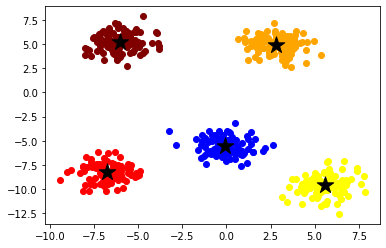

In [41]:
# Repeat this cell few times or put it inside a loop
assignPointsToCluster(clusters, X)

plotclusters(clusters)

updateCluster(clusters)
#prediction 
#you can run these block of code until the clusters center position are 
#same after and beforing running it!!

# Comparing from actual Outputs

In [ ]:
X, y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=3)


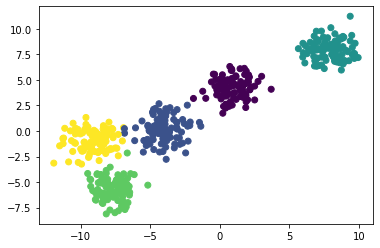

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c= y)
plt.show()


#KMeans++(from Sklearn)

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
km = KMeans(n_clusters=5)
#press shift + tab in jupyter notebook to check about the Cluster 
# init='k-means++' defaultly kmeans is set and above we have done randomly


init : {'k-means++', 'random'} or ndarray of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization, defaults to 'k-means++':

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

n_init : int, default=10
    Number of time the k-means algorithm will be run with different
    centroid seeds. The final results will be the best output of
    n_init consecutive runs in terms of inertia.

In [ ]:
km.fit(X)
#fit means we are training on Data (X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#so it associate every point with each clusters
print(km.labels_)

[4 2 3 4 4 3 1 4 2 4 2 3 2 4 3 4 2 4 4 2 0 0 4 3 4 0 1 1 3 1 4 1 0 0 4 0 2
 2 4 0 0 0 1 1 3 2 2 1 1 1 2 4 1 4 4 0 4 4 2 3 2 3 3 4 1 2 3 3 0 3 0 4 0 4
 0 3 4 1 0 0 3 0 3 1 2 1 3 2 1 3 1 0 4 0 0 2 4 3 3 0 2 0 3 3 2 2 2 3 3 4 2
 1 4 2 3 0 2 1 0 3 2 3 1 4 0 1 1 1 4 4 3 3 4 2 2 1 3 1 3 4 4 0 3 2 1 4 2 2
 4 3 4 4 3 3 2 0 0 1 3 4 0 2 1 0 2 0 2 0 0 0 1 4 0 2 0 1 4 3 2 1 2 4 2 0 1
 1 0 4 3 2 0 3 1 4 1 0 3 1 4 4 4 0 0 2 4 1 1 4 2 4 4 4 0 2 3 2 4 4 2 1 3 1
 1 0 4 3 4 3 1 0 3 3 4 0 4 0 3 2 3 0 0 2 4 4 3 3 0 2 0 4 1 2 1 4 1 1 1 1 2
 0 2 4 0 2 1 3 2 2 2 1 4 4 3 0 0 2 3 3 4 3 1 3 2 2 1 1 0 1 1 2 0 4 3 0 3 1
 3 3 2 4 0 2 0 0 4 1 0 3 0 1 4 4 3 2 0 1 2 0 3 1 2 1 4 0 1 3 3 0 0 0 4 1 0
 4 2 3 3 1 2 2 3 3 1 0 0 0 4 1 2 1 4 0 2 2 3 0 0 1 0 1 3 3 3 1 0 4 0 3 1 1
 2 4 2 1 4 1 3 2 0 2 3 4 4 2 2 0 2 0 1 3 2 1 4 4 2 3 0 1 4 4 4 1 2 0 2 2 2
 1 0 3 2 3 3 1 3 4 3 4 2 0 0 4 2 1 4 0 3 2 1 3 1 1 2 1 3 1 2 1 3 1 4 0 0 1
 0 2 0 0 1 4 4 3 1 0 3 1 3 2 3 2 4 0 3 4 3 4 4 0 4 0 1 2 2 3 4 4 1 1 2 1 1
 2 1 2 2 2 1 0 1 3 2 3 3 

In [ ]:
km.cluster_centers_
#this is the coordinate of centroids


array([[ 0.88641907,  4.19441853],
       [-9.0671623 , -0.96740759],
       [ 7.8649674 ,  7.97988109],
       [-3.97953526,  0.19458336],
       [-7.6726196 , -5.69211059]])

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares.<br>

Inertia is the sum of squared error for each cluster. Therefore the smaller the inertia the denser the cluster(closer together all the points are).

In [ ]:
km.inertia_


999.7464835530949

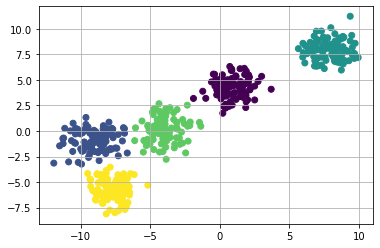

In [ ]:
plt.grid(True)
plt.scatter(X[:,0], X[:, 1], c= km.labels_)


A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters(k) into which the data may be clustered.<br>
The Elbow Method is one of the most popular methods to determine this optimal value of k.

![995b8b58-06f1-4884-a2a1-f3648428e947](https://user-images.githubusercontent.com/42711978/87897915-5f27a800-ca6a-11ea-96b0-5b60e22d403a.png)


The Elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) <br>
and then for each value of k computes an average score for all clusters.<br>
 
By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

#Dominant color Extraction

![maldives-island](https://user-images.githubusercontent.com/42711978/87903363-71f5a900-ca79-11ea-9317-3c7dc7eccc27.jpg)


In [24]:
import cv2

In [117]:
from skimage import io
#The following reads the image directly into a NumPy array
img= io.imread('https://user-images.githubusercontent.com/42711978/87903363-71f5a900-ca79-11ea-9317-3c7dc7eccc27.jpg')

In [118]:
type(img)


numpy.ndarray

In [119]:
img.shape

(1200, 1600, 3)

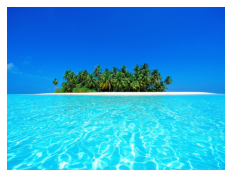

In [120]:
plt.imshow(img)
plt.axis(False)
plt.show()


In [121]:
#it converts the MxNx3 image into a Kx3 matrix where K=MxN 
# Each row is now a vector in the 3-D space of RGB
all_pixels=img.reshape((-1,3))

In [122]:
all_pixels.shape


(1920000, 3)

In [123]:
from sklearn.cluster import KMeans


We are going to cluster with k = 4 because if we look at the image above it has 4 colors<br>==>Sky, Forest, Sea and  Seashore.

In [124]:
k=4
km=KMeans(n_clusters=k)

In [125]:
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [126]:
km.cluster_centers_

array([[  6.54741117, 106.68291717, 225.19832517],
       [ 29.9804088 , 216.28432676, 241.09338714],
       [ 42.48260854,  73.84196298,  33.66321841],
       [145.43074911, 241.22896578, 243.18741988]])

In [127]:
centers=np.array(km.cluster_centers_,dtype="uint")

In [128]:
centers

array([[  6, 106, 225],
       [ 29, 216, 241],
       [ 42,  73,  33],
       [145, 241, 243]], dtype=uint64)

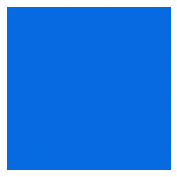

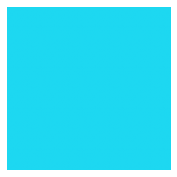

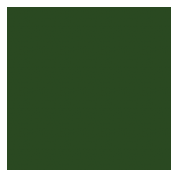

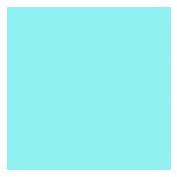

In [129]:
for c in centers:
    a=np.zeros((100,100,3))
    a[:,:,:]=c
    
    plt.imshow(a/255)
    plt.axis("off")
    plt.show()

In [130]:
km.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [131]:
new_img = np.zeros((all_pixels.shape[0], 3), dtype="uint")

In [132]:
new_img.shape

(1920000, 3)

In [133]:
# giving appropriate colors to the pixel/data points of new image
for ix in range(all_pixels.shape[0]):
    new_img[ix] = centers[km.labels_[ix]]

In [134]:
new_img


array([[  6, 106, 225],
       [  6, 106, 225],
       [  6, 106, 225],
       ...,
       [ 29, 216, 241],
       [ 29, 216, 241],
       [ 29, 216, 241]], dtype=uint64)

In [135]:
new_img = new_img.reshape((1200, 1600,3))


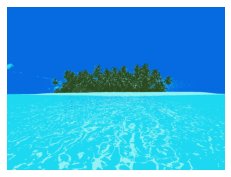

In [136]:
plt.imshow(new_img)
plt.axis("off")
plt.show()

#Try Out this image 


![1_eNA8yGWbWZcmjQ8K4HuTCw](https://user-images.githubusercontent.com/42711978/87936403-6671a480-cab0-11ea-931c-269280feafa8.png)


In [137]:
from skimage import io
#The following reads the image directly into a NumPy array
img2= io.imread('https://user-images.githubusercontent.com/42711978/87903363-71f5a900-ca79-11ea-9317-3c7dc7eccc27.jpg')

#Clustering ANALYSIS EXAMPLE

In [21]:
import pandas as pd

In [22]:
data=pd.read_csv("https://raw.githubusercontent.com/aryangulati/Python_Code/master/12.)Clustering/Mall_Customers.csv")


In [23]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
X = data.iloc[:, [3, 4]].values

In [25]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

**WCSS**
An ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS).<br> WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids. The idea is to minimise the sum.

![KMEANS-WCSS-DEF-1024x386](https://user-images.githubusercontent.com/42711978/87970313-2c6cc680-cae1-11ea-865b-a775d7d06ec1.png)


![1_vLTnh9xdgHvyC8WDNwcQQw](https://user-images.githubusercontent.com/42711978/87970465-6c33ae00-cae1-11ea-82bd-a826ec115d0d.png)
number of cluster==>

so in this example at k=3 we have minimum WCSS

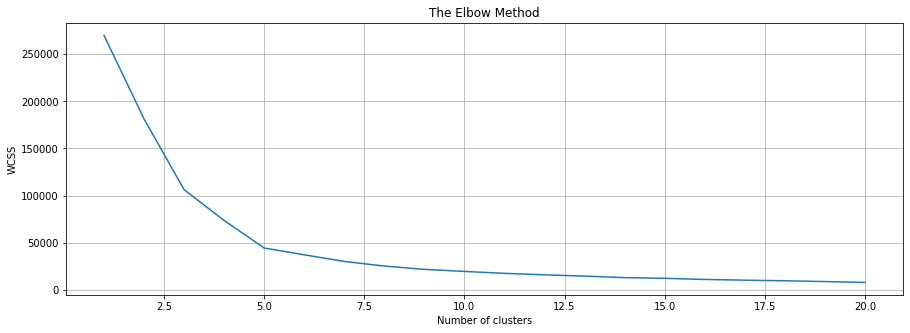

In [40]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1,21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

so we can see At k=5 our WCSS=>Average within-cluster Sum of Squares





In [41]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit_predict(X)

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [42]:
X_pts=kmeans.fit_predict(X)

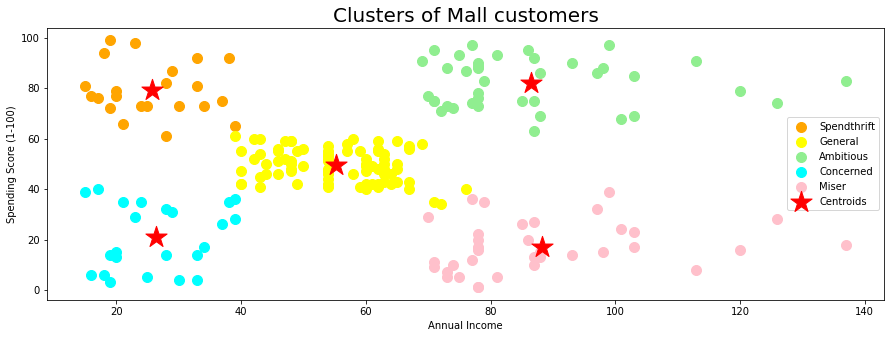

In [43]:
plt.scatter(X[X_pts == 0, 0], X[X_pts == 0, 1], s = 100, c = 'orange', label = 'Spendthrift')
plt.scatter(X[X_pts == 1, 0], X[X_pts == 1, 1], s = 100, c = 'yellow', label = 'General')
plt.scatter(X[X_pts == 2, 0], X[X_pts == 2, 1], s = 100, c = 'lightgreen', label = 'Ambitious')
plt.scatter(X[X_pts == 3, 0], X[X_pts == 3, 1], s = 100, c = 'cyan', label = 'Concerned')
plt.scatter(X[X_pts == 4, 0], X[X_pts == 4, 1], s = 100, c = 'pink', label = 'Miser')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],marker="*", s = 500, c = 'red', label = 'Centroids')
plt.title('Clusters of Mall customers',fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

So Clustering Give us a clear view about the different types of the customers in the Mall. <br>
There are Five types of Customers based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

In [61]:
x1= data.iloc[:, [2, 4]].values
x1.shape

(200, 2)

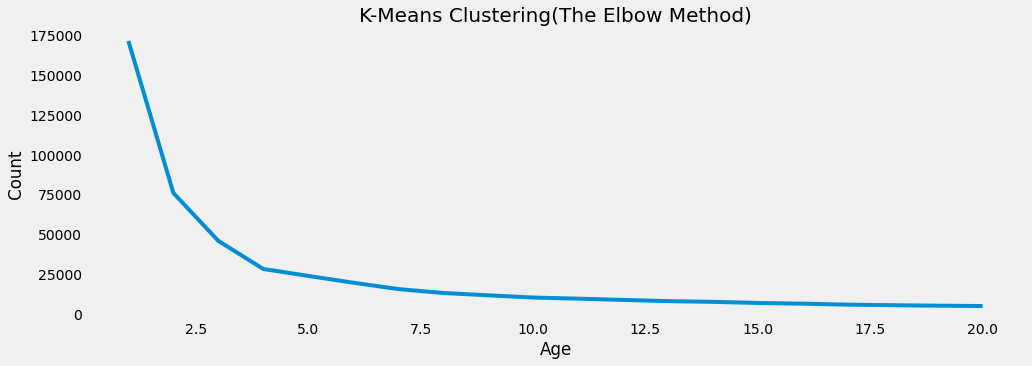

In [62]:
wcss=[]
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 21), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

so we can see At k=4 our WCSS=>Average within-cluster Sum of Squares<br>
as 2.5+5.0/2=3.75
so lets take 4


In [67]:
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
x1pts = km.fit_predict(x1)

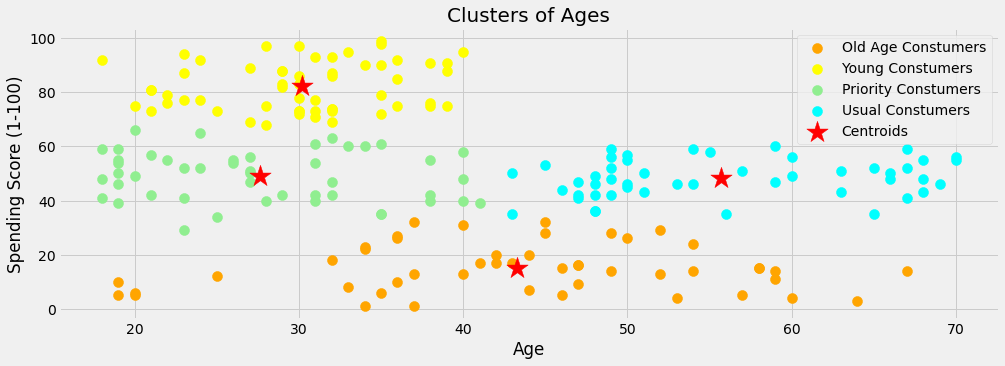

In [68]:
plt.scatter(x1[x1pts == 0, 0], x1[x1pts == 0, 1], s = 100, c = 'orange', label = 'Old Age Constumers')
plt.scatter(x1[x1pts == 1, 0], x1[x1pts == 1, 1], s = 100, c = 'yellow', label = 'Young Constumers')
plt.scatter(x1[x1pts == 2, 0], x1[x1pts == 2, 1], s = 100, c = 'lightgreen', label = 'Priority Constumers')
plt.scatter(x1[x1pts == 3, 0], x1[x1pts == 3, 1], s = 100, c = 'cyan', label = 'Usual Constumers')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],marker="*", s = 500, c = 'red', label = 'Centroids')
plt.style.use('fivethirtyeight')
plt.title('Clusters of Ages',fontsize=20)
plt.xlabel("Age")
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Above clustering plot between the age of the customers and their corresponding spending scores, I have aggregated them into 4 different clusters<br>
Then after getting the results we can accordingly make different marketing strategies and policies to optimize the spending scores of the customer in the Mall.

In [70]:
x = data[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
#values here is for converting into numpy
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_